# Astar dataset

The puprose of this dataset is to explore learning end to end the Astar algorithm from scratch.
This dataset provides the enviroment defined as a grid, where:
- 0 indicates free space, and 1 indicates obstacle.
- Not all enviroments have a solution.
- The solution is defined as a sequence of actions, where:
   0 -> up, 1 -> right, 2 -> down, 3 -> left
- The solution is given as a series of actions [0, 1, 0, 2]

## The input

The input is of the shape 3 x n x m, where:
- n: height of the grid for planning
- m: width of the grid for planning
- The 3 nxm grids are: 1. The grid representing the environment, 2. The one hot encoded vector representing the start, 3. The one hot encoded vector representing the goal

## The output
The output will be 5 classes:
- Move up
- Move down
- Move right
- Move left
- Do nothing (no solution exists)
The problem can be treated as a classification problem, where each of the above actions can have a specific probability.


There are 2 problems that this dataset can help solve:
1. Whether a solution exits or not (completeness)
2. Finiding the optimal solution if it exists

In [38]:
import numpy as np
import matplotlib.pyplot as plt
import time

In [40]:
# Set the grid size here
n, m = 10, 10  # grid size for the problem
N = 10000      # Number of examples

# Probability of existence of obstacle
obstacle_probability = 0.2

In [43]:
def createDataInstance(n, m, obstacle_p=0.2):
    x = np.empty((3, n, m))
    zero_positions = np.array([])
    while len(zero_positions) == 0:
        x[0, :, :] = np.random.choice([0, 1], size=(n, m), p=[1.0 - obstacle_p, obstacle_p])
        zero_positions = np.argwhere(x[0] == 0)

    x[1, :, :] = np.zeros(shape=(n,m))
    x[2, :, :] = np.zeros(shape=(n,m))

    index = zero_positions[np.random.choice(len(zero_positions))]
    x[1, index[0], index[1]] = 1 
    index = zero_positions[np.random.choice(len(zero_positions))]
    x[2, index[0], index[1]] = 1

    return x

# def createLabel(x):
    # first validate x
    # Find the optimal path using astar
    # This becomes a classification problem, with 4 classes:
    # - Right / left / up / down
    # Use softmax output layer


def plotX(x):
    # Plot the grid
    plt.imshow(x[0], cmap='RdYlGn', interpolation='nearest')

    # Plot the starting position
    start_index = np.argwhere(x[1] == 1)[0]
    plt.scatter(start_index[1], start_index[0], color='blue', s=100, label='Random Zero Position')
    goal_index = np.argwhere(x[2] == 1)[0]
    plt.scatter(goal_index[1], goal_index[0], color='yellow', s=100, label='Random Zero Position')

def createDataset(N, n, m, obstacle_p=0.2):
    X = np.empty((N, 3, n, m))
    for i in range(N):
        X[i] = createDataInstance(n, m, obstacle_p)
    return X

In [44]:
# Create the data set
start = time.time()
X = createDataset(N, n, m, obstacle_probability)
print(f"Execution time: {time.time() - start:.4f} seconds")

Execution time: 0.7598 seconds


[[[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
  [1. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
  [0. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 1. 0. 0. 0. 1. 0. 0.]
  [0. 0. 0. 0. 0. 0. 1. 0. 0. 1.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 1. 0. 0. 0. 0. 0. 1. 0.]
  [0. 0. 1. 0. 0. 0. 0. 1. 0. 1.]]

 [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]

 [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0

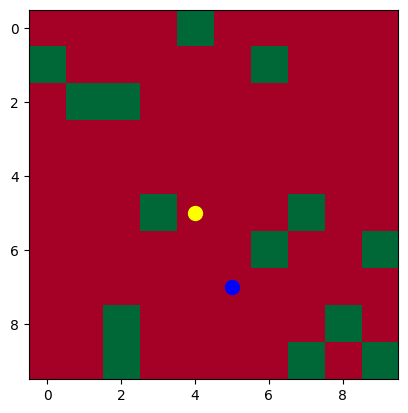

In [45]:
x = createDataInstance(n, m, obstacle_probability)
print(x)
plotX(x)